In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import zipfile
import os

# Define the path to the uploaded ZIP file and the extraction directory
zip_path = 'Validation.zip'
extract_path = '/content/Validation'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
base_dir = '/content/Validation'

# List subdirectories in the base directory
for subdir, dirs, files in os.walk(base_dir):
    if dirs:
        print(f"Subdirectories in {subdir}: {dirs}")
    if files:
        print(f"Files in {subdir}: {files}")



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Correct directory structure
train_dir = '/content/Validation/Validation'  # Adjust if necessary

datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    validation_split=0.2       # Split data into training and validation sets
)

# Reload data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Check number of classes and class labels
print(f"Number of classes: {len(train_data.class_indices)}")
print(f"Class labels: {train_data.class_indices}")


Found 18032 images belonging to 39 classes.
Found 4492 images belonging to 39 classes.
Number of classes: 39
Class labels: {'#': 0, '$': 1, '&': 2, '0': 3, '1': 4, '2': 5, '3': 6, '4': 7, '5': 8, '6': 9, '7': 10, '8': 11, '9': 12, '@': 13, 'A': 14, 'B': 15, 'C': 16, 'D': 17, 'E': 18, 'F': 19, 'G': 20, 'H': 21, 'I': 22, 'J': 23, 'K': 24, 'L': 25, 'M': 26, 'N': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38}


In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
with tf.device('/GPU:0'):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(39, activation='softmax')  # 39 classes
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

# Train the model
with tf.device('/GPU:0'):
    history = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=10
    )


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


564/564 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.7036 - loss: 1.1578 - val_accuracy: 0.8473 - val_loss: 0.4826
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9294 - loss: 0.2193 - val_accuracy: 0.8691 - val_loss: 0.5011
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9558 - loss: 0.1336 - val_accuracy: 0.8368 - val_loss: 0.6556
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.9698 - loss: 0.0847 - val_accuracy: 0.8649 - val_loss: 0.5831
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9727 - loss: 0.0779 - val_accuracy: 0.8526 - val_loss: 0.8458
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9774 - loss: 0.0646 - val_accuracy: 0.8709 - val_loss: 0.7619
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9809 - loss: 0.0498 - val_accuracy: 0.8393 - val_loss: 1.0636
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9844 - loss: 0.0435 - val_accurac

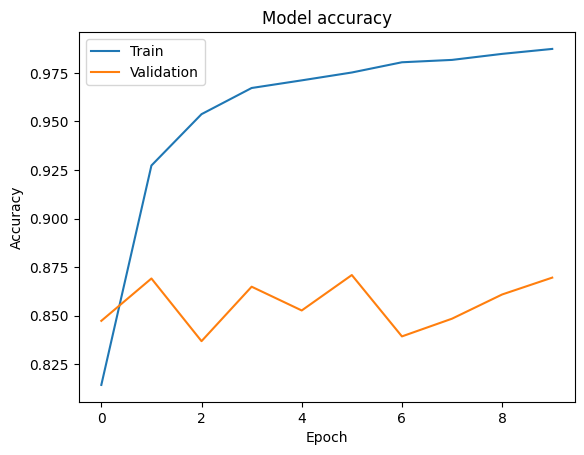

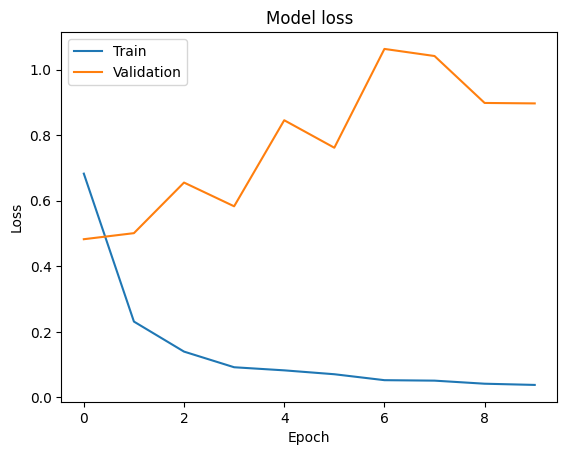

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
pip install python-telegram-bot


In [ ]:
import telegram
print(telegram.__version__)


21.4


In [ ]:
from telegram.ext import filters


In [ ]:
!pip install nest_asyncio


In [ ]:
import nest_asyncio
nest_asyncio.apply()


In [ ]:
from telegram import Update
from telegram.ext import Application, CommandHandler, MessageHandler, CallbackContext, filters
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [ ]:
nest_asyncio.apply()

In [ ]:
# Define path for the temporary image
IMAGE_PATH = '/content/temp_image.jpg'


In [ ]:
# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [ ]:
# Define command handler for /start
async def start(update: Update, context: CallbackContext):
    await update.message.reply_text('Send me a photo of handwritten text and I will recognize it.')


In [ ]:
# Define message handler for photo messages
async def handle_photo(update: Update, context: CallbackContext):
    # Download the photo
    photo_file = await update.message.photo[-1].get_file()
    await photo_file.download_to_drive(IMAGE_PATH)

    # Load and preprocess the image
    img_array = load_and_preprocess_image(IMAGE_PATH)

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Map predicted class index to class label
    class_labels = {v: k for k, v in train_data.class_indices.items()}
    predicted_label = class_labels.get(predicted_class[0], "Unknown")

    await update.message.reply_text(f"Recognized Text: {predicted_label}")


In [ ]:
# Main function to start the bot
async def main():
    # Create the Application and pass it your bot's token
    application = Application.builder().token("Replace_with_your_token").build()  # Replace with your token

    # Add handlers
    application.add_handler(CommandHandler("start", start))
    application.add_handler(MessageHandler(filters.PHOTO, handle_photo))

    # Start polling
    await application.run_polling()


In [ ]:
if __name__ == '__main__':
    import asyncio
    asyncio.run(main())
